# Analysis of Restaurants in Paris on the basis of its Type and Distance Using Foursquare API 

# 1) INTRODUCTION:- Paris, The Capital of France is considered as one of the best food cities in Europe. The French capital is bustling with great choices of new restaurants by talented young chefs from all over the world, plus an inventive and diverse array of casual dining options. The idea of this project is to Analyse the various types of Restaurants present in Paris on the basis of its Type and Distance from the Centre by using the Foursquare API(Distance is in units since it is measured with the help of latitude and longtitude coordinates.) which will be of great use to a client or a tourist to determine what are the types of Restaurants in Paris that are worth visiting based on its type and proximity.


# I have taken Distance as a Parameter since it plays an important role for a tourist to decide which type of restaurant is near to his/her residence which will save time. 

# 2) DATA:- The data that we will be using is the Foursquare Location Data of Paris, France which is of Restaurant Type by using the geographical coordinates in the form of Latitude and Longtitude.  

# Importing the Necessary Libraries

In [9]:
import numpy as np 
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import folium
!conda install -c conda-forge geopy --yes
print('All the necessary Libraries are imported.')

Solving environment: ...working... 
  - anaconda/win-64::ca-certificates-2019.8.28-0, anaconda/win-64::certifi-2019.9.11-py37_0, anaconda/win-64::openssl-1.1.1d-he774522_2
  - anaconda/win-64::ca-certificates-2019.8.28-0, anaconda/win-64::openssl-1.1.1d-he774522_2, defaults/win-64::certifi-2019.9.11-py37_0
  - anaconda/win-64::ca-certificates-2019.8.28-0, anaconda/win-64::certifi-2019.9.11-py37_0, defaults/win-64::openssl-1.1.1d-he774522_2
  - anaconda/win-64::ca-certificates-2019.8.28-0, defaults/win-64::certifi-2019.9.11-py37_0, defaults/win-64::openssl-1.1.1d-he774522_2
  - anaconda/win-64::certifi-2019.9.11-py37_0, defaults/win-64::ca-certificates-2019.8.28-0, defaults/win-64::openssl-1.1.1d-he774522_2
  - defaults/win-64::ca-certificates-2019.8.28-0, defaults/win-64::certifi-2019.9.11-py37_0, defaults/win-64::openssl-1.1.1d-he774522_2
  - anaconda/win-64::certifi-2019.9.11-py37_0, anaconda/win-64::openssl-1.1.1d-he774522_2, defaults/win-64::ca-certificates-2019.8.28-0
  - anaconda

# Obtaining the Geographical Coordinates of Paris.   

In [10]:
address = 'Paris, Paris'

geolocator = Nominatim(user_agent="paris_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Paris are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Paris are 48.8566969, 2.3514616.


# Setting Up The Foursquare API with the Client ID and other credentials.

In [3]:
CLIENT_ID = 'BV4EOHUQT3AJKYAN2PVQCZJSOKYIH23FZLF3U1F0IVA3STUA' # your Foursquare ID
CLIENT_SECRET = 'WK5FS4GDRT5S10PWSKNGINNLO4VE3K4HNCLKQGV0QYVMSRIL' # your Foursquare Secret
VERSION = '202001218' # Foursquare API version
LIMIT = 100
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: BV4EOHUQT3AJKYAN2PVQCZJSOKYIH23FZLF3U1F0IVA3STUA
CLIENT_SECRET:WK5FS4GDRT5S10PWSKNGINNLO4VE3K4HNCLKQGV0QYVMSRIL


# Specifying the Search Query, that is, Restaurant. 

In [4]:
search_query = 'Restaurant'
radius = 50000
print(search_query + ' .... Done!')

Restaurant .... Done!


In [5]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=BV4EOHUQT3AJKYAN2PVQCZJSOKYIH23FZLF3U1F0IVA3STUA&client_secret=WK5FS4GDRT5S10PWSKNGINNLO4VE3K4HNCLKQGV0QYVMSRIL&ll=48.8566969,2.3514616&v=202001218&query=Restaurant&radius=50000&limit=100'

# Getting the Results and Transforming that Information into a Pandas Dataframe. 

In [6]:
results = requests.get(url).json()
venues = results['response']['venues']
dataframe = json_normalize(venues)
dataframe.head()

,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,location.crossStreet,location.neighborhood,venuePage.id
0,50445ef7e4b0ba0a539ad83f,Restaurant Aux Tours de Notre-Dame,"[{'id': '4bf58dd8d48988d10c941735', 'name': 'F...",v-1582183651,False,23 rue d'Arcole,48.853622,2.349421,"[{'label': 'display', 'lat': 48.85362193008465...",373,75004,FR,Paris,Île-de-France,France,"[23 rue d'Arcole, 75004 Paris, France]",NaN,NaN,NaN
1,59ab059c86bc49021b313ca9,Restaurant Le Mona Lisa,"[{'id': '4bf58dd8d48988d10c941735', 'name': 'F...",v-1582183651,False,47 rue Berger,48.862198,2.342542,"[{'label': 'display', 'lat': 48.86219809159731...",895,75001,FR,Paris,Île-de-France,France,"[47 rue Berger, 75001 Paris, France]",NaN,NaN,NaN
2,4cbb05054352a1cd0d4396f5,Le Restaurant du Musée d'Orsay,"[{'id': '4bf58dd8d48988d10c941735', 'name': 'F...",v-1582183651,False,1 rue de la Légion d'Honneur,48.860300,2.325392,"[{'label': 'display', 'lat': 48.86029986248957...",1950,75007,FR,Paris,Île-de-France,France,"[1 rue de la Légion d'Honneur, 75007 Paris, Fr...",NaN,NaN,NaN
3,4e2b2d0ad22d3f83c88c7029,Le Restaurant des Poètes,"[{'id': '4bf58dd8d48988d10c941735', 'name': 'F...",v-1582183651,False,12 passage Molière,48.862321,2.351590,"[{'label': 'display', 'lat': 48.86232131013030...",626,75003,FR,Paris,Île-de-France,France,"[12 passage Molière, 75003 Paris, France]",NaN,NaN,NaN
4,52cf091111d2d9bb920d6122,Restaurant Costes Saint-Honoré,"[{'id': '4bf58dd8d48988d10c941735', 'name': 'F...",v-1582183651,False,Hôtel Costes,48.866698,2.327894,"[{'label': 'display', 'lat': 48.86669789450374...",2053,NaN,FR,Paris,Île-de-France,France,"[Hôtel Costes (239 rue Saint-Honoré), Paris, F...",239 rue Saint-Honoré,NaN,NaN


# Filtering the Information in the Dataframe as per the Problem Statement.

In [7]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_paris = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_paris['categories'] = dataframe_paris.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_paris.columns = [column.split('.')[-1] for column in dataframe_paris.columns]

dataframe_paris.head(10)

,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,crossStreet,neighborhood,id
0,Restaurant Aux Tours de Notre-Dame,French Restaurant,23 rue d'Arcole,48.853622,2.349421,"[{'label': 'display', 'lat': 48.85362193008465...",373,75004,FR,Paris,Île-de-France,France,"[23 rue d'Arcole, 75004 Paris, France]",NaN,NaN,50445ef7e4b0ba0a539ad83f
1,Restaurant Le Mona Lisa,French Restaurant,47 rue Berger,48.862198,2.342542,"[{'label': 'display', 'lat': 48.86219809159731...",895,75001,FR,Paris,Île-de-France,France,"[47 rue Berger, 75001 Paris, France]",NaN,NaN,59ab059c86bc49021b313ca9
2,Le Restaurant du Musée d'Orsay,French Restaurant,1 rue de la Légion d'Honneur,48.860300,2.325392,"[{'label': 'display', 'lat': 48.86029986248957...",1950,75007,FR,Paris,Île-de-France,France,"[1 rue de la Légion d'Honneur, 75007 Paris, Fr...",NaN,NaN,4cbb05054352a1cd0d4396f5
3,Le Restaurant des Poètes,French Restaurant,12 passage Molière,48.862321,2.351590,"[{'label': 'display', 'lat': 48.86232131013030...",626,75003,FR,Paris,Île-de-France,France,"[12 passage Molière, 75003 Paris, France]",NaN,NaN,4e2b2d0ad22d3f83c88c7029
4,Restaurant Costes Saint-Honoré,French Restaurant,Hôtel Costes,48.866698,2.327894,"[{'label': 'display', 'lat': 48.86669789450374...",2053,NaN,FR,Paris,Île-de-France,France,"[Hôtel Costes (239 rue Saint-Honoré), Paris, F...",239 rue Saint-Honoré,NaN,52cf091111d2d9bb920d6122
5,Restaurant de l'Institut du Monde Arabe.,Middle Eastern Restaurant,1 rue des Fossés Saint-Bernard,48.848818,2.356911,"[{'label': 'display', 'lat': 48.84881796195433...",963,75005,FR,Paris,Île-de-France,France,[1 rue des Fossés Saint-Bernard (Institut du M...,Institut du Monde Arabe,NaN,4bd1e55c9854d13a2c79fa4d
6,Restaurant Hotel Little Palace,Restaurant,Hotel Little Palace,48.867386,2.353741,"[{'label': 'display', 'lat': 48.867386, 'lng':...",1201,75003,FR,Paris,Île-de-France,France,"[Hotel Little Palace (4 rue Salomon de Caus), ...",4 rue Salomon de Caus,NaN,4f8e6f92e4b0cb228782dc5f
7,Restaurant Le Meurice Alain Ducasse,French Restaurant,228 rue de Rivoli,48.865291,2.328056,"[{'label': 'display', 'lat': 48.86529145109384...",1963,75001,FR,Paris,Île-de-France,France,"[228 rue de Rivoli (Hôtel Le Meurice), 75001 P...",Hôtel Le Meurice,NaN,4adcda13f964a520e53621e3
8,Le Restaurant de L'Hôtel,French Restaurant,13 rue des Beaux-Arts,48.856192,2.335133,"[{'label': 'display', 'lat': 48.85619157441753...",1197,75006,FR,Paris,Île-de-France,France,"[13 rue des Beaux-Arts (L'Hôtel), 75006 Paris,...",L'Hôtel,NaN,4bbcc19b8ec3d13aa42e1b28
9,Restaurant administratif,Restaurant,Campus Jussieu - Bâtiment F,48.847206,2.358817,"[{'label': 'display', 'lat': 48.84720550724002...",1186,75015,FR,Paris,Île-de-France,France,"[Campus Jussieu - Bâtiment F (Place Jussieu), ...",Place Jussieu,NaN,530df4fa498ea908ad40c23c


# The Above Dataframe is the  "DATA" component of the project. It contains all the information like name of the restaurant, it's type, geographical coordinates, distance etc. 

# Now Let's Explore the City of Paris by using the Folium Library which is used to create Leaflet Maps. 

In [8]:
import matplotlib. pyplot as plt
import folium
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13)
venues_map

# As we can see from the Map, Paris is a Large City. Now The Most Important Thing is to specify where are the Restaurants in this Map which were present in the Dataset derived by Using the Foursquare API. These are Specified by using Blue Markers in the Following Line of Code. 

In [12]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generates a map centred around the City of Paris
for lat, lng, label in zip(dataframe_paris.lat, dataframe_paris.lng, dataframe_paris.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)
# display map
venues_map

# As we can see from the map the location of the Restaurants in Paris as specified in the Dataset. Most of them are around the city while some of them are present at a faraway distance. 

# Analysing the Restaurants on the basis of Type.

# Let's Determine the Number of Type of Restaurants present in Paris.

In [13]:
print (dataframe_paris['categories'].value_counts())

French Restaurant            22
Restaurant                    3
College Cafeteria             3
Vietnamese Restaurant         2
Japanese Restaurant           2
Szechuan Restaurant           2
Turkish Restaurant            2
Middle Eastern Restaurant     2
Sandwich Place                1
Cafeteria                     1
Persian Restaurant            1
Bistro                        1
Hotel Bar                     1
Arepa Restaurant              1
Corporate Cafeteria           1
Chinese Restaurant            1
Fast Food Restaurant          1
Italian Restaurant            1
Food Court                    1
Korean Restaurant             1
Name: categories, dtype: int64


# As we can see, The Number of French Restaurants are in Large Amount while the General Restaurants, Cafeterias, Japanese, Viatnamese and other types of Restaurants are in Low Amount.

# Let's Represent this Information in the form of a Pandas Dataframe as follows.

In [14]:
Paris_Top = dataframe_paris['categories'].value_counts()[0:10].to_frame(name='frequency')
Paris_Top=Paris_Top.reset_index()


Paris_Top.rename(index=str, columns={"index": "categories", "frequency": "Frequency"}, inplace=True)
Paris_Top

,categories,Frequency
0,French Restaurant,22
1,Restaurant,3
2,College Cafeteria,3
3,Vietnamese Restaurant,2
4,Japanese Restaurant,2
5,Szechuan Restaurant,2
6,Turkish Restaurant,2
7,Middle Eastern Restaurant,2
8,Sandwich Place,1
9,Cafeteria,1


# Let's Visualize this Information in the form of a Bar Chart by using the Seaborn Data Visualization Library.

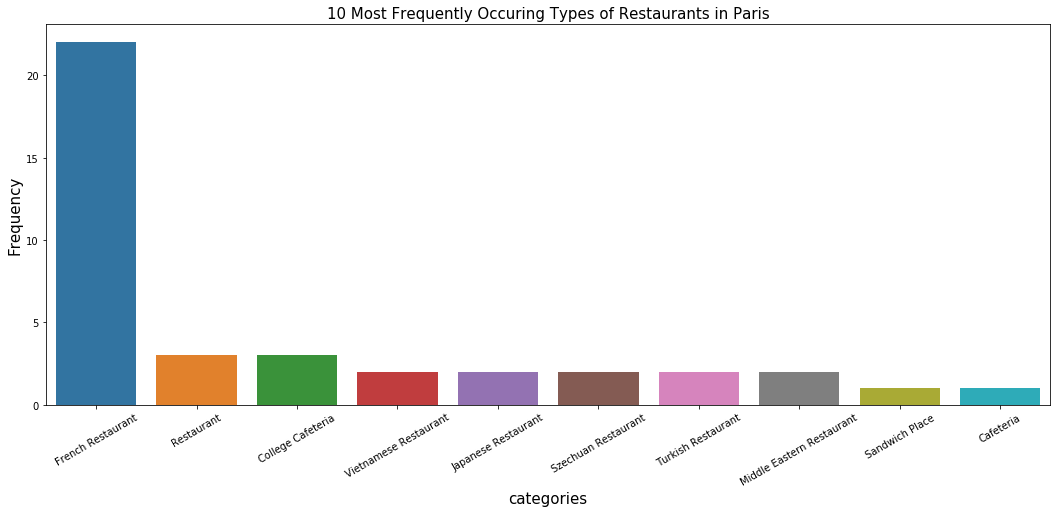

In [15]:
import seaborn as sns
fig = plt.figure(figsize=(18,7))
s=sns.barplot(x="categories", y="Frequency", data=Paris_Top)
s.set_xticklabels(s.get_xticklabels(), rotation=30)
plt.title('10 Most Frequently Occuring Types of Restaurants in Paris', fontsize=15)
plt.xlabel("categories", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.show()

# As the Bar Chart Shows, The French Restaurants are the most prominent type of Restaurants in Paris while the College Cafeterias, Viatnamese Restaurants, Japanese,Turkish and Middle-Eastern Restaurants are also prevalent. Also, the"Restaurants" Category is of General Restaurants.<br> Now how this information is useful for a Client or a Tourist?
# Suppose A Tourist Decides to visit Paris and is not sure about which type of food is available apart from the french type restaurants as there are many types of food all across the world. This analysis gives an insight of the types of Restaurant Options one can consider while planning to Visit Paris.      

# The Second Factor that comes into consideration is Distance. How far the Restaurant is from the Centre(Centre is considered since the geographical coordinates in the form of latitude and longtitude are used.)

# Analysing the Restaurants on the Basis of Distance.

# Let's Create a Separate Dataframe which contains the name of Restaurants present in Paris. 

In [17]:
FR=dataframe_paris['name']
FR=FR.reset_index()
FR.head(30)

,index,name
0,0,Restaurant Aux Tours de Notre-Dame
1,1,Restaurant Le Mona Lisa
2,2,Le Restaurant du Musée d'Orsay
3,3,Le Restaurant des Poètes
4,4,Restaurant Costes Saint-Honoré
5,5,Restaurant de l'Institut du Monde Arabe.
6,6,Restaurant Hotel Little Palace
7,7,Restaurant Le Meurice Alain Ducasse
8,8,Le Restaurant de L'Hôtel
9,9,Restaurant administratif


# Let's Create a Separate Dataframe which contains the Categories of Restaurants present in Paris.

In [18]:
FR2=dataframe_paris['categories']
FR2=FR2.reset_index()
FR2.head(30)

,index,categories
0,0,French Restaurant
1,1,French Restaurant
2,2,French Restaurant
3,3,French Restaurant
4,4,French Restaurant
5,5,Middle Eastern Restaurant
6,6,Restaurant
7,7,French Restaurant
8,8,French Restaurant
9,9,Restaurant


# Let's Merge the 2 Dataframes.

In [19]:
FR3= (pd.merge(FR, FR2, on="index" ))
FR3.head(40)

,index,name,categories
0,0,Restaurant Aux Tours de Notre-Dame,French Restaurant
1,1,Restaurant Le Mona Lisa,French Restaurant
2,2,Le Restaurant du Musée d'Orsay,French Restaurant
3,3,Le Restaurant des Poètes,French Restaurant
4,4,Restaurant Costes Saint-Honoré,French Restaurant
5,5,Restaurant de l'Institut du Monde Arabe.,Middle Eastern Restaurant
6,6,Restaurant Hotel Little Palace,Restaurant
7,7,Restaurant Le Meurice Alain Ducasse,French Restaurant
8,8,Le Restaurant de L'Hôtel,French Restaurant
9,9,Restaurant administratif,Restaurant


# Let's Check whether we have all the data and no data is missed. 

In [20]:
FR3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 3 columns):
index         50 non-null int64
name          50 non-null object
categories    50 non-null object
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


# Let's create a Dataframe which contains the Distance(in units) which will be merged with the previous dataframe.  

In [21]:
FR4=dataframe_paris['distance']
FR4=FR4.reset_index()
FR4.head(40)

,index,distance
0,0,373
1,1,895
2,2,1950
3,3,626
4,4,2053
5,5,963
6,6,1201
7,7,1963
8,8,1197
9,9,1186


In [22]:
FR4.drop(columns='index')

,distance
0,373
1,895
2,1950
3,626
4,2053
5,963
6,1201
7,1963
8,1197
9,1186


# Let's Merge the Distance Dataframe with the Previous Dataframe. 

In [23]:
FR5= (pd.merge(FR3, FR4, on='index'))
FR5.head(40)

,index,name,categories,distance
0,0,Restaurant Aux Tours de Notre-Dame,French Restaurant,373
1,1,Restaurant Le Mona Lisa,French Restaurant,895
2,2,Le Restaurant du Musée d'Orsay,French Restaurant,1950
3,3,Le Restaurant des Poètes,French Restaurant,626
4,4,Restaurant Costes Saint-Honoré,French Restaurant,2053
5,5,Restaurant de l'Institut du Monde Arabe.,Middle Eastern Restaurant,963
6,6,Restaurant Hotel Little Palace,Restaurant,1201
7,7,Restaurant Le Meurice Alain Ducasse,French Restaurant,1963
8,8,Le Restaurant de L'Hôtel,French Restaurant,1197
9,9,Restaurant administratif,Restaurant,1186


# Now Let's Sort the Dataframe on the basis of Distance.

In [43]:
FR6 = FR5.sort_values(by ='distance' )
FR6.head(20)

,index,name,categories,distance
16,16,Restaurant Viet,Vietnamese Restaurant,131
42,42,Restaurant Shiso,Japanese Restaurant,330
0,0,Restaurant Aux Tours de Notre-Dame,French Restaurant,373
32,32,Restaurant Istamboul,Sandwich Place,396
29,29,Restaurant Jardin Notre-Dame,French Restaurant,573
45,45,Restaurant Les Degrés de Notre Dame,French Restaurant,603
3,3,Le Restaurant des Poètes,French Restaurant,626
49,49,Restaurant 't Nieuwe Kafe,Arepa Restaurant,786
38,38,Restaurant AT,Japanese Restaurant,820
28,28,Restaurant Le Sinner,French Restaurant,863


# Let's Retrieve the Top 10 Restaurants which are ideal to be considered for a Tourist based on its proximity from the centre. 

In [34]:
FR6.head(10)

,index,name,categories,distance
16,16,Restaurant Viet,Vietnamese Restaurant,131
42,42,Restaurant Shiso,Japanese Restaurant,330
0,0,Restaurant Aux Tours de Notre-Dame,French Restaurant,373
32,32,Restaurant Istamboul,Sandwich Place,396
29,29,Restaurant Jardin Notre-Dame,French Restaurant,573
45,45,Restaurant Les Degrés de Notre Dame,French Restaurant,603
3,3,Le Restaurant des Poètes,French Restaurant,626
49,49,Restaurant 't Nieuwe Kafe,Arepa Restaurant,786
38,38,Restaurant AT,Japanese Restaurant,820
28,28,Restaurant Le Sinner,French Restaurant,863


# Let's Visualize the Type of Restaurants based on Distance.

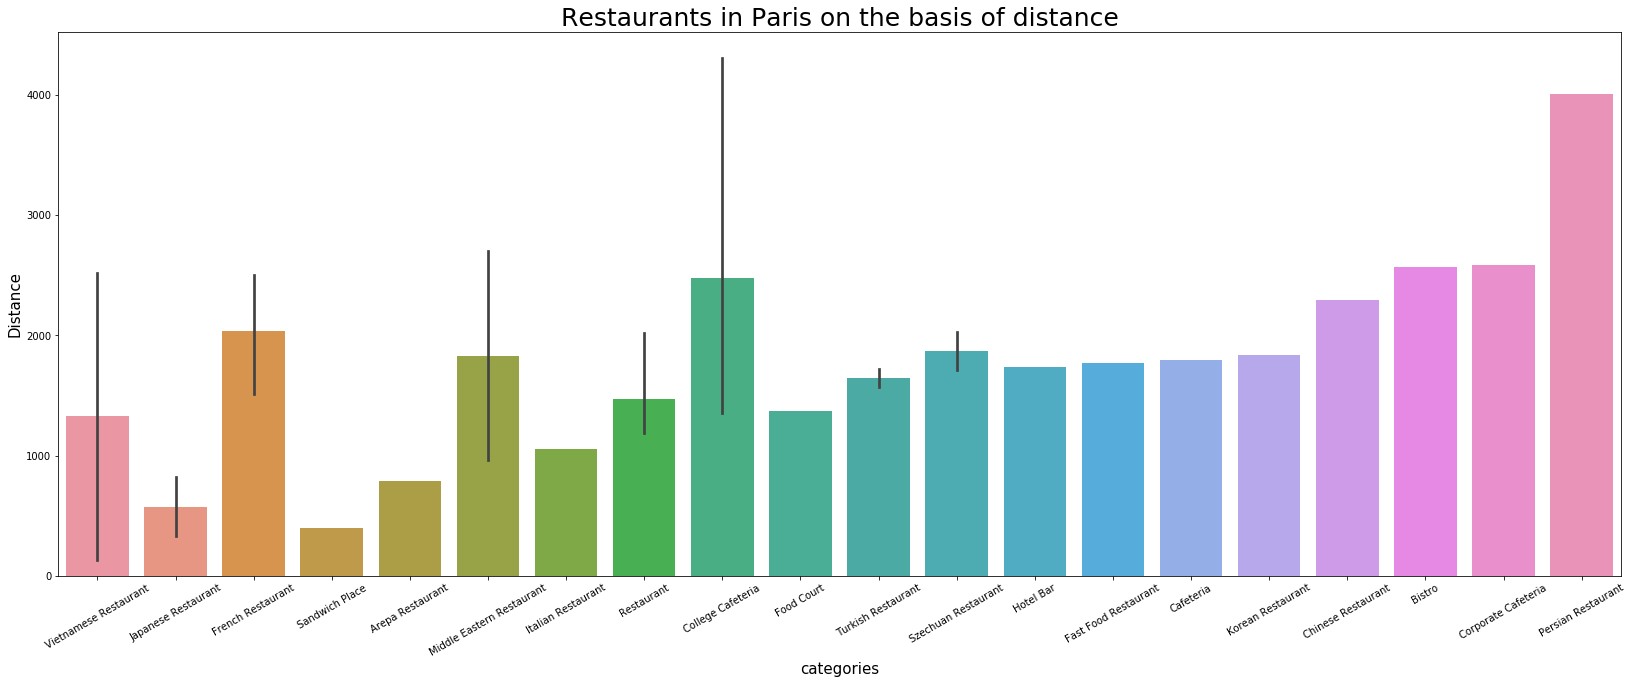

In [29]:
import seaborn as sns
fig = plt.figure(figsize=(28,10))
s=sns.barplot(x="categories", y="distance",  data=FR6)
s.set_xticklabels(s.get_xticklabels(), rotation=30)
plt.title('Restaurants in Paris on the basis of distance', fontsize=25)
plt.xlabel("categories", fontsize=15)
plt.ylabel ("Distance", fontsize=15)
plt.show()

# The type of Restaurants with a Larger Distance that is, Persian Restaurant will not be an ideal choice for a Restaurant nearby while the one with a shorter Distance like Japanese, Sandwich Place, Viatnamese, Italian and French Restaurants will be a good Choice for a Tourist. The Black Lines on the Bar Chart describes that there is some deviation from the actual values and it is an approximation.     

# Let's Create a New Dataframe which will focus on the Top 10 Restaurants based on the Distance.

In [41]:
FR7= FR6.copy()
FR7[:10]


,index,name,categories,distance
16,16,Restaurant Viet,Vietnamese Restaurant,131
42,42,Restaurant Shiso,Japanese Restaurant,330
0,0,Restaurant Aux Tours de Notre-Dame,French Restaurant,373
32,32,Restaurant Istamboul,Sandwich Place,396
29,29,Restaurant Jardin Notre-Dame,French Restaurant,573
45,45,Restaurant Les Degrés de Notre Dame,French Restaurant,603
3,3,Le Restaurant des Poètes,French Restaurant,626
49,49,Restaurant 't Nieuwe Kafe,Arepa Restaurant,786
38,38,Restaurant AT,Japanese Restaurant,820
28,28,Restaurant Le Sinner,French Restaurant,863


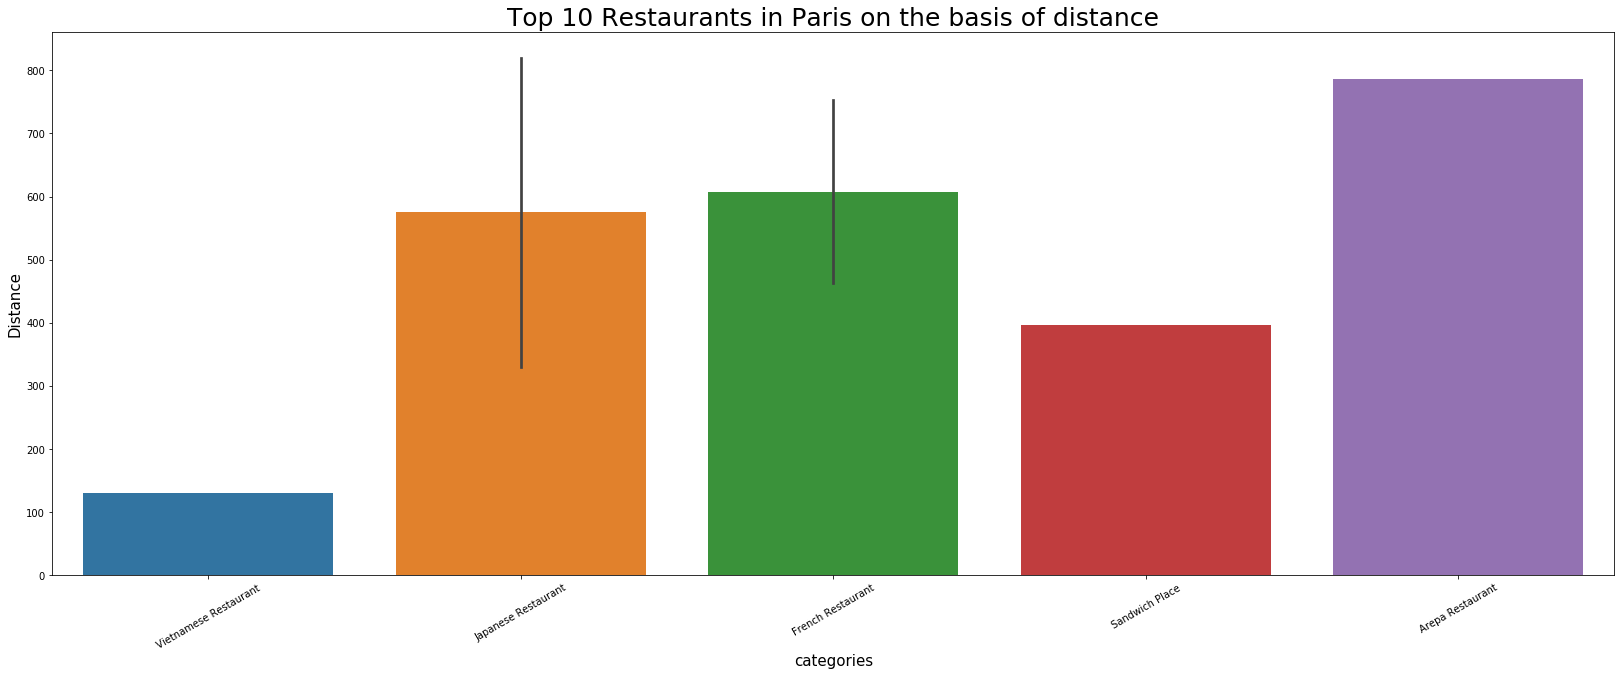

In [42]:
import seaborn as sns
fig = plt.figure(figsize=(28,10))
s=sns.barplot(x="categories", y="distance",  data=FR7[:10])
s.set_xticklabels(s.get_xticklabels(), rotation=30)
plt.title('Top 10 Restaurants in Paris on the basis of distance', fontsize=25)
plt.xlabel("categories", fontsize=15)
plt.ylabel ("Distance", fontsize=15)
plt.show()

# As we can see from the Bar Chart, The French, Japanese, Viatnemese(the most optimal) and the Sandwich Place are the ideal Restaurants which are good options for a Tourist. 

# Now How This Information (based on Distance) is Beneficial??
# Every Tourist wants to save time and Money and get the best favourable food. Instead of Travelling a Lot of Distance and Spending a lot, One can find the different types of Restaurants nearby therefore, getting a lot of diverse options.   